# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree


# Loading Datasets

In [2]:

titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic = titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Label Encoding


In [6]:
sex_label = LabelEncoder()
embarked_label = LabelEncoder()

titanic['Sex'] = sex_label.fit_transform(titanic['Sex'])
sex_map = dict(enumerate(sex_label.classes_))

titanic['Embarked'] = embarked_label.fit_transform(titanic['Embarked'])
embarked_map = dict(enumerate(embarked_label.classes_))

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [7]:
print(f'Sex Mapping -- > {sex_map}')
print(f'Embarked_mapping -- > {embarked_map}')

Sex Mapping -- > {0: 'female', 1: 'male'}
Embarked_mapping -- > {0: 'C', 1: 'Q', 2: 'S'}


In [8]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [9]:
scaled = StandardScaler()

X_scaled = scaled.fit_transform(X)
print(X_scaled)

[[ 0.82737724  0.73769513 -0.56573646 ... -0.47367361 -0.50244517
   0.58595414]
 [-1.56610693 -1.35557354  0.66386103 ... -0.47367361  0.78684529
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.25833709 ... -0.47367361 -0.48885426
   0.58595414]
 ...
 [ 0.82737724 -1.35557354 -0.1046374  ...  2.00893337 -0.17626324
   0.58595414]
 [-1.56610693  0.73769513 -0.25833709 ... -0.47367361 -0.04438104
  -1.9423032 ]
 [ 0.82737724  0.73769513  0.20276197 ... -0.47367361 -0.49237783
  -0.67817453]]


In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [11]:

tree = DecisionTreeClassifier(max_depth=5,min_samples_split=2,random_state=0)

tree.fit(X_train,Y_train)

X_train_pred = tree.predict(X_train)
X_test_pred = tree.predict(X_test)

train_acc = accuracy_score(Y_train,X_train_pred)
test_acc = accuracy_score(Y_test,X_test_pred)

print(f'train accuracy : {train_acc}')
print(f'test accuracy : {test_acc}')


train accuracy : 0.8469101123595506
test accuracy : 0.8156424581005587


In [12]:
print(classification_report(Y_train,X_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       439
           1       0.83      0.76      0.79       273

    accuracy                           0.85       712
   macro avg       0.84      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712



In [13]:
print(classification_report(Y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



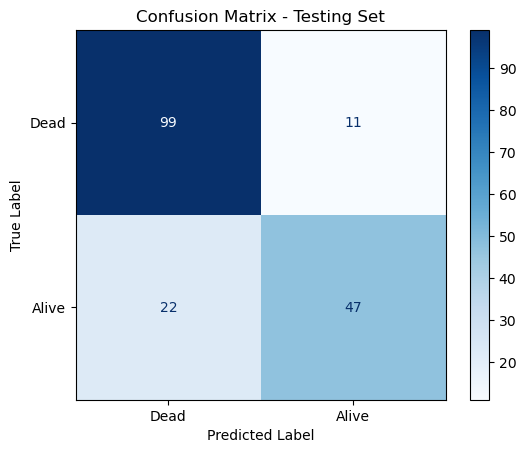

In [15]:

conf_mat = confusion_matrix(Y_test, X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


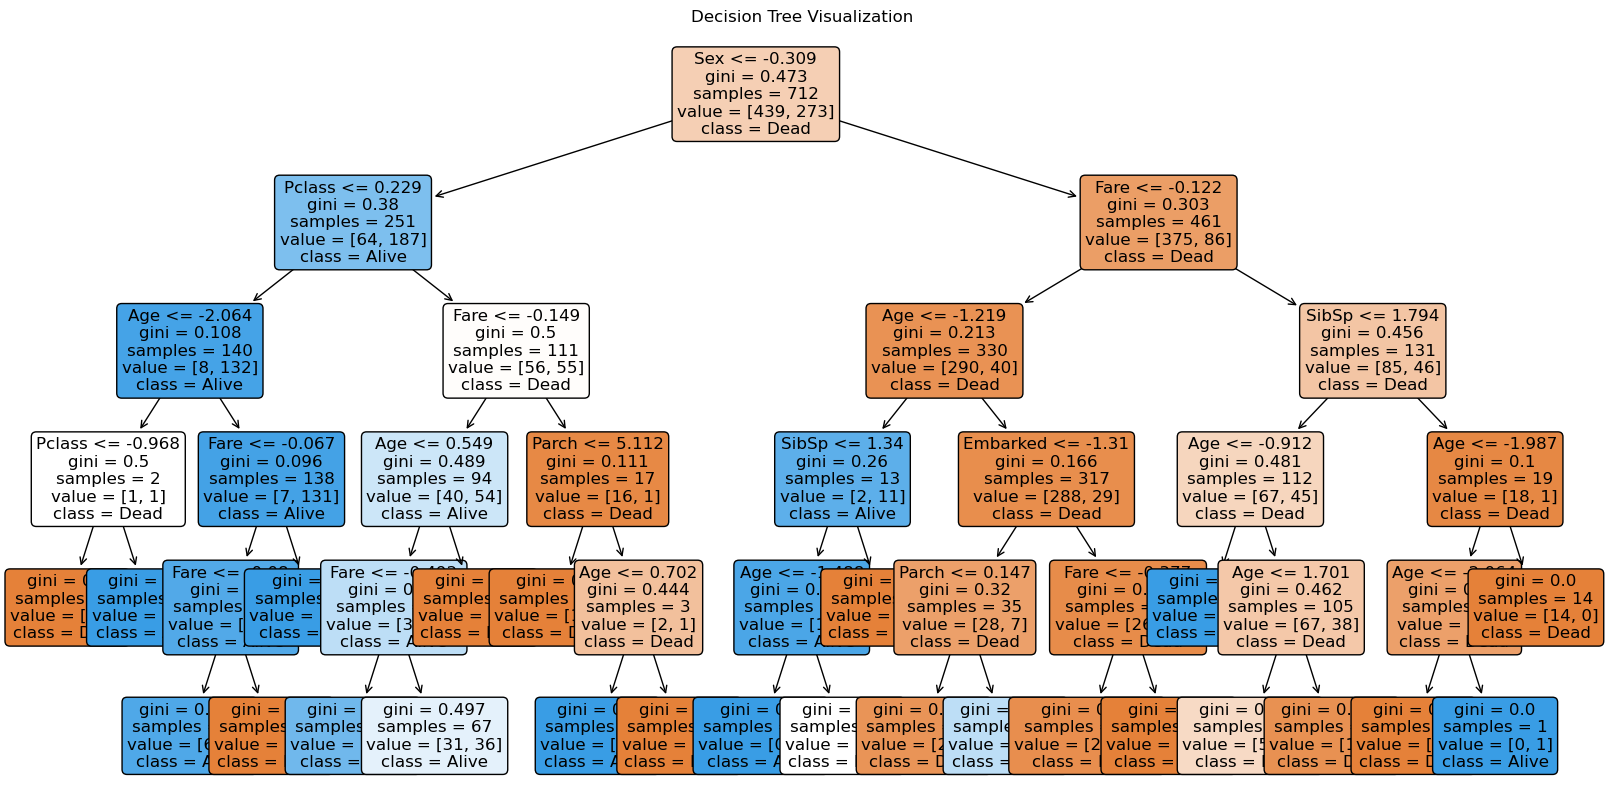

In [16]:
plt.figure(figsize=(20,10))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=['Dead','Alive'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()


In [17]:
param = {
    "max_depth" : [None,2,3,4,5,6,7,8,9,10],
    "min_samples_split" : range(2,50),
    "criterion" : ['gini','entropy','log_loss'],
    "min_samples_leaf" : [1,2,3,4,5],
    "max_features" : ["auto", "sqrt", "log2"]
}

In [18]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid = param,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': range(2, 50)},
             scoring='accuracy')

In [19]:
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters from GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 19}
Best Cross-Validation Accuracy: 0.8146


In [24]:
best_tree = grid_search.best_estimator_


X_train_pred_best = best_tree.predict(X_train)
train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:}")

X_test_pred_best = best_tree.predict(X_test)
test_acc_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_acc_best:.4f}")


Train Accuracy with Best Parameters: 0.851123595505618
Test Accuracy with Best Parameters: 0.7877


In [25]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=['Dead','Alive']))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=['Dead','Alive']))

Classification Report - Training Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.84      0.95      0.89       439
       Alive       0.89      0.70      0.78       273

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.86      0.85      0.85       712

Classification Report - Testing Set (Best Estimator):
              precision    recall  f1-score   support

        Dead       0.76      0.95      0.85       110
       Alive       0.86      0.54      0.66        69

    accuracy                           0.79       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.79      0.77       179



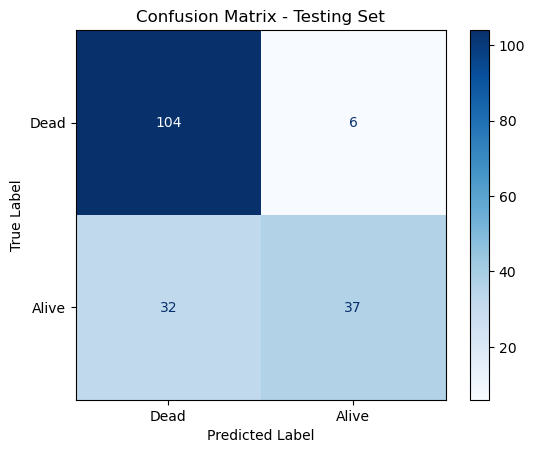

In [26]:

conf_mat = confusion_matrix(Y_test, X_test_pred_best)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Dead','Alive'])
Matrix.plot(cmap=plt.cm.Blues, values_format='d')  
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
